In [17]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

# Zipf


In [18]:
#file is too big, read it line by line
def next_file_line(file_name):
    with open(file_name, "rt") as in_file:
        yield from in_file

#find the words in each raw      
word_pattern = re.compile(r"\w+")
word_freq = {}
words_counter = 0
for file_raw in next_file_line("data.txt"):
    raw_words = re.findall(word_pattern, file_raw)
    for word in raw_words:
        words_counter += 1
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
            
print("file is read")

file is read


In [19]:
ranked_words_frequency = sorted(word_freq.values(), reverse=True)

In [20]:
word_ranks = [i+1 for i in range(len(ranked_words_frequency))]

In [21]:
#zipf function
def calc_zipf_approximate_func(x_iterable, C, k):
    return [C*math.pow(i, -1 * k) for i in x_iterable]

In [22]:
#simple data to log10 scale
def make_data_for_log_scale(data):
    scaling = lambda i : math.log(i, 10)
    return np.array(list(map(scaling, data)))

In [23]:
#prepare all date for plotting
x_log = make_data_for_log_scale(word_ranks)
C = 954708
zipf1 = make_data_for_log_scale(calc_zipf_approximate_func(word_ranks, C, 0.9))
zipf2 = make_data_for_log_scale(calc_zipf_approximate_func(word_ranks, C, 1.0))
zipf3 = make_data_for_log_scale(calc_zipf_approximate_func(word_ranks, C, 1.1))
y_log = make_data_for_log_scale(ranked_words_frequency)

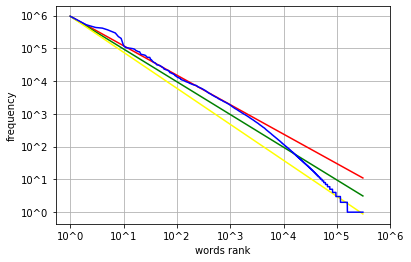

In [24]:
plt.plot(x_log, zipf1, color="red")
plt.plot(x_log, zipf2, color="green")
plt.plot(x_log, zipf3, color="yellow")
plt.plot(x_log, y_log, color="blue")
ticks = range(7)
name_ticks = ["10^{}".format(i) for i in ticks]
axes = plt.gca()
axes.set_xticks(ticks)
axes.set_yticks(ticks)
axes.set_xticklabels(name_ticks)
axes.set_yticklabels(name_ticks)
plt.grid()
plt.xlabel("words rank")
plt.ylabel("frequency")
plt.show()

In [25]:
# We built with the red, yellow and green colors functions type C/(x^k), where parametrs C = 954708 and k ~~ 1(0.9, 1.0, 1.1).
# As we can on the graph there is the function of word`s frequency built by blue color. The blue function goes very close to 
# zipf functions.

# Similarity Measurement I

In [26]:

D1 = 'this is a text about web science'.split(' ')
D2 = 'web science is covering the analysis of text corpa'.split(' ')
D3 = 'scientific methods are used to analyze web pages'.split(' ')

#create a function which helps us to find intersection the other documents with
def intersection(LIST_1, LIST_2): 
    return  list(set(LIST_1)&set(LIST_2))

# create a function which helps us to find unique words between D0 and the other documents
def union(LIST_1, LIST_2): 
    return list(set(LIST_1+LIST_2))

# create a function which helps us to calculate Jaccard_coefficient
def Jaccard_coefficient(LIST_1, LIST_2):
    return len(LIST_1)/len(LIST_2)

print('intersection_D1_D2 =', len(intersection(D1,D2)),',', 'union_D1_D2 =', len(union(D1,D2)),',', 'Jaccard_coefficient_D0_D1 =' ,Jaccard_coefficient(intersection(D1,D2), union(D1,D2)))
print('intersection_D1_D3 =', len(intersection(D1,D3)),',', 'union_D1_D3 =', len(union(D1,D3)),',', 'Jaccard_coefficient_D0_D2 =' ,Jaccard_coefficient(intersection(D1,D3), union(D1,D3)))
print('intersection_D2_D3 =', len(intersection(D2,D3)),',', 'union_D2_D3 =', len(union(D2,D3)),',', 'Jaccard_coefficient_D0_D3 =' ,Jaccard_coefficient(intersection(D2,D3), union(D2,D3)))


intersection_D1_D2 = 4 , union_D1_D2 = 12 , Jaccard_coefficient_D0_D1 = 0.3333333333333333
intersection_D1_D3 = 1 , union_D1_D3 = 14 , Jaccard_coefficient_D0_D2 = 0.07142857142857142
intersection_D2_D3 = 1 , union_D2_D3 = 16 , Jaccard_coefficient_D0_D3 = 0.0625


In [27]:
df=pd.DataFrame({'Intersection':[len(intersection(D1,D2)), len(intersection(D1,D3)),len(intersection(D2,D3))],
                'Union':[len(union(D1,D2)),len(union(D1,D3)),len(union(D2,D3))],
                'Jaccard_coefficient':[Jaccard_coefficient(intersection(D1,D2), union(D1,D2)),
                                       Jaccard_coefficient(intersection(D1,D3), union(D1,D3)),
                                       Jaccard_coefficient(intersection(D2,D3), union(D2,D3))]},
               index=['D1_D2','D1_D3','D2_D3'])
df

,Intersection,Union,Jaccard_coefficient
D1_D2,4,12,0.333333
D1_D3,1,14,0.071429
D2_D3,1,16,0.062500


#   Similarity Measurement II

 Generates a term frequency vector for each of the document

In [28]:
list_D1 = "i love you".split(' ')
list_D2 = "you are beautiful".split(' ')
list_D3 = "i love beautiful koblenz".split(' ')

Union_all_documents= list(set(list_D1+list_D2+list_D3))# find all unique words in all the documents
Union_all_documents.sort()# sort the values alphabetically

# create a function that help us to count words in documents with respect to Vocabulary
def count(LIST):
    list_count=[]
    for x in Union_all_documents:
         list_count.insert(Union_all_documents.index(x),LIST.count(x))
    return list_count

# create a function that help us to count the sum of words in documents with respect to Vocabulary


df2=pd.DataFrame({'D_1': count(list_D1),  'D_2': count(list_D2), 'D_3': count(list_D3)},index=[Union_all_documents])
df2

,D_1,D_2,D_3
are,0,1,0
beautiful,0,1,1
i,1,0,1
koblenz,0,0,1
love,1,0,1
you,1,1,0


Find scalar product 

In [29]:
ScalarProductD1_D2=np.dot(df2['D_1'],df2['D_2']) # vector D1 and D2
ScalarProductD1_D3=np.dot(df2['D_1'],df2['D_3']) # vector D1 and D3
ScalarProductD2_D3=np.dot(df2['D_2'],df2['D_3']) # vector D2 and D3
print(ScalarProductD1_D2,ScalarProductD1_D3,ScalarProductD2_D3)

1 2 1


Find the legth of each vector

In [30]:
d1=0
d2=0
d3=0
for i in range(len(df2)) : 
    d1 += int(df2.iloc[i, 0])**2
    d2 += int(df2.iloc[i, 1])**2
    d3 += int(df2.iloc[i, 2])**2
d1=math.sqrt(d1)
d2=math.sqrt(d2)
d3=math.sqrt(d3)
print(d1,d2,d3)

1.7320508075688772 1.7320508075688772 2.0


Find  CosineSimilarity and angle

In [31]:
def cosineSimilaity(ScalarProduct, length1,length2):
    return  round( ScalarProduct/(length1*length2) , 4)

CosineSimilarityD1_D2=cosineSimilaity(ScalarProductD1_D2,d1,d2)
CosineSimilarityD1_D3=cosineSimilaity(ScalarProductD1_D3,d1,d3)
CosineSimilarityD2_D3=cosineSimilaity(ScalarProductD2_D3,d2,d3)
print(CosineSimilarityD1_D2, CosineSimilarityD1_D3, CosineSimilarityD2_D3)

0.3333 0.5774 0.2887


In [32]:
print("Similarity of D1 and D2:", CosineSimilarityD1_D2, "\n", 
      "Angle distance of D1 and D2:", math.degrees(math.acos(CosineSimilarityD1_D2)),'\n', '\n',
     "Similarity of D1 and D3:", CosineSimilarityD1_D3, "\n", 
      "Angle distance of D1 and D3:", math.degrees(math.acos(CosineSimilarityD1_D3)),'\n', '\n',
     "Similarity of D2 and D3:", CosineSimilarityD2_D3, "\n", 
      "Angle distance of D2 and D3:", math.degrees(math.acos(CosineSimilarityD2_D3)),'\n')


Similarity of D1 and D2: 0.3333 
 Angle distance of D1 and D2: 70.53080506456054 
 
 Similarity of D1 and D3: 0.5774 
 Angle distance of D1 and D3: 54.73212049625207 
 
 Similarity of D2 and D3: 0.2887 
 Angle distance of D2 and D3: 73.21985708058762 

